In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [24]:
train = pd.read_csv("./data/train.csv")

In [25]:
test = pd.read_csv("./data/test.csv")

In [26]:
train["datetime"] = pd.to_datetime(train["datetime"], format="%Y/%m/%d")
train.head()

,datetime,y,client,close,price_am,price_pm
0,2010-07-01,17,0,0,-1,-1
1,2010-07-02,18,0,0,-1,-1
2,2010-07-03,20,0,0,-1,-1
3,2010-07-04,20,0,0,-1,-1
4,2010-07-05,14,0,0,-1,-1


In [27]:
train["month"] = train["datetime"].dt.strftime("%y/%m")
train["year"] = train["datetime"].dt.strftime("%y")

train.head()


,datetime,y,client,close,price_am,price_pm,month,year
0,2010-07-01,17,0,0,-1,-1,10/07,10
1,2010-07-02,18,0,0,-1,-1,10/07,10
2,2010-07-03,20,0,0,-1,-1,10/07,10
3,2010-07-04,20,0,0,-1,-1,10/07,10
4,2010-07-05,14,0,0,-1,-1,10/07,10


In [28]:
# train["month"] = pd.to_datetime(train["month"], format="%Y/%m")
# train.head()


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  2101 non-null   datetime64[ns]
 1   y         2101 non-null   int64         
 2   client    2101 non-null   int64         
 3   close     2101 non-null   int64         
 4   price_am  2101 non-null   int64         
 5   price_pm  2101 non-null   int64         
 6   month     2101 non-null   object        
 7   year      2101 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 131.4+ KB


In [30]:
# sns.pairplot(train)

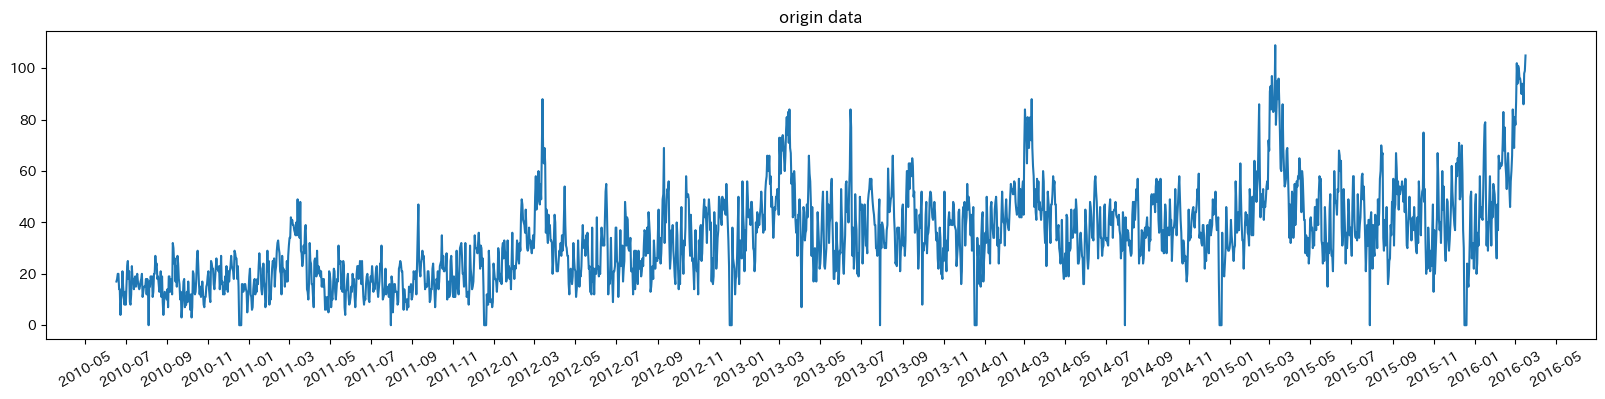

In [31]:
# 
import matplotlib.dates as mdates
import japanize_matplotlib

fig, ax = plt.subplots(figsize=(20,4))
plt.xticks(rotation=30)
ax.plot(train["datetime"], train["y"])
plt.title("origin data")

# 日付の指定
locator = mdates.MonthLocator(bymonthday=15, interval=2)
ax.xaxis.set_major_locator(locator)

In [32]:
# pd.pivot_table(train, index="close", columns="y")
train.describe()

,y,client,close,price_am,price_pm
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000
mean,34.096621,0.098049,0.012851,0.614469,0.390766
std,17.476234,0.297451,0.112658,1.127940,0.975456
min,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,0.000000,0.000000,1.000000,1.000000
max,109.000000,1.000000,1.000000,5.000000,5.000000


In [33]:
train.isnull().sum()

datetime    0
y           0
client      0
close       0
price_am    0
price_pm    0
month       0
year        0
dtype: int64

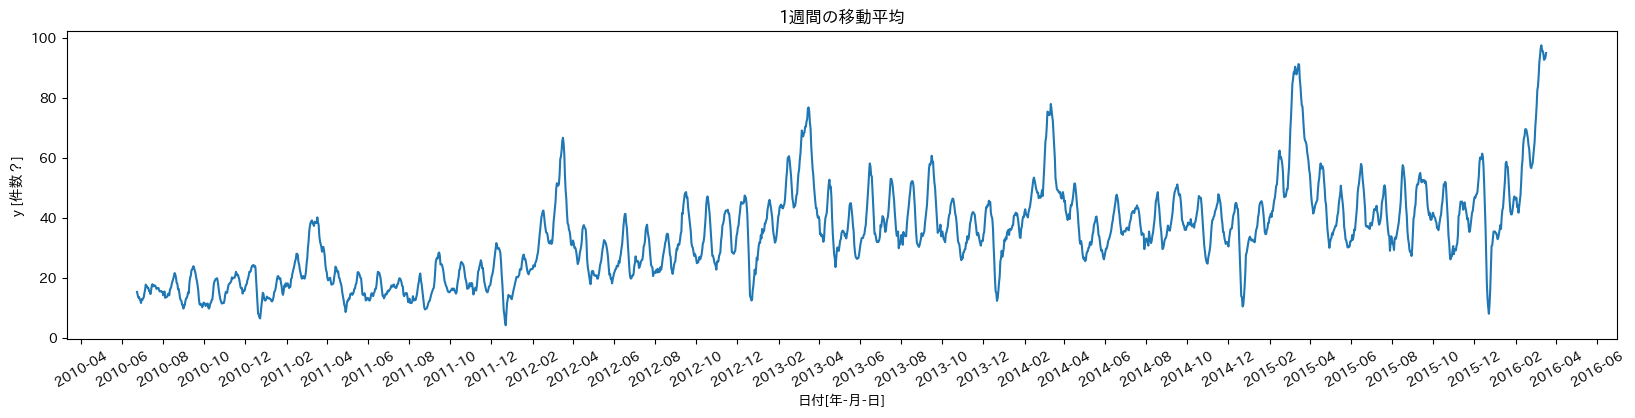

In [34]:
# 移動平均
train["move_avg_week"] = train["y"].rolling(window=7).mean()


fig2, ax2 = plt.subplots(figsize=(20,4))

#軸の角度
plt.xticks(rotation=30)

# ラベル
plt.title("1週間の移動平均")
plt.ylabel("y [件数？]")
plt.xlabel("日付[年-月-日]")

ax2.plot(train["datetime"], train["move_avg_week"])

# 日付の指定
locator = mdates.MonthLocator(bymonthday=15, interval=2)
ax2.xaxis.set_major_locator(locator)

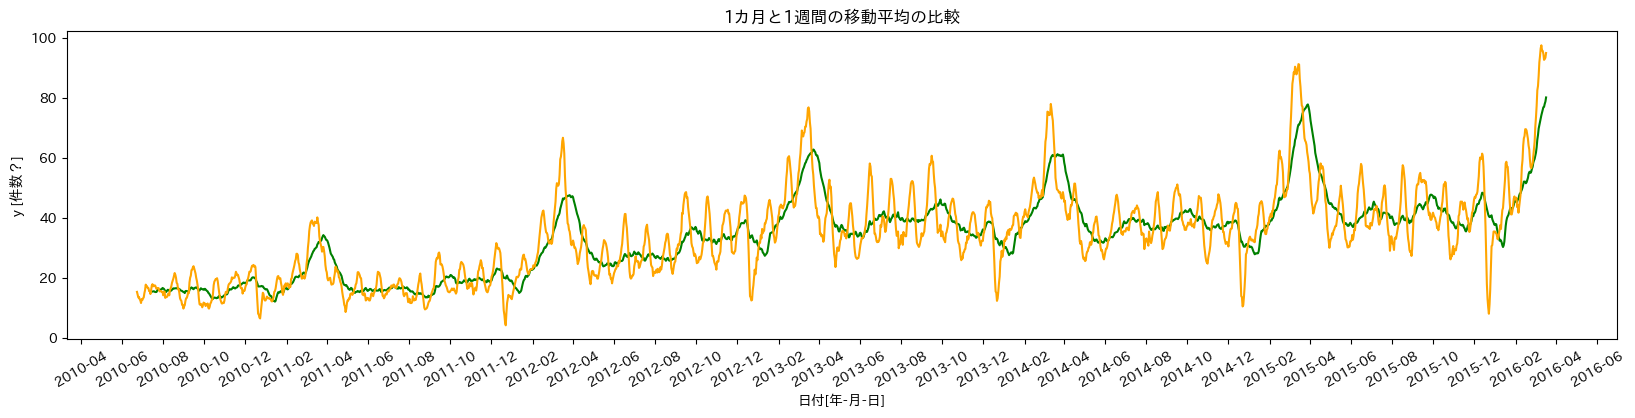

In [51]:
# 移動平均
train["move_avg_month"] = train["y"].rolling(window=30).mean()


fig2, ax2 = plt.subplots(figsize=(20,4))

#軸の角度
plt.xticks(rotation=30)

# ラベル
plt.title("1カ月と1週間の移動平均の比較")
plt.ylabel("y [件数？]")
plt.xlabel("日付[年-月-日]")

ax2.plot(train["datetime"], train["move_avg_month"], c="green")

# 日付の指定
locator = mdates.MonthLocator(bymonthday=15, interval=2)
ax2.xaxis.set_major_locator(locator)
# 移動平均が赤
ax2.plot(train["datetime"], train["move_avg_week"], c="orange")

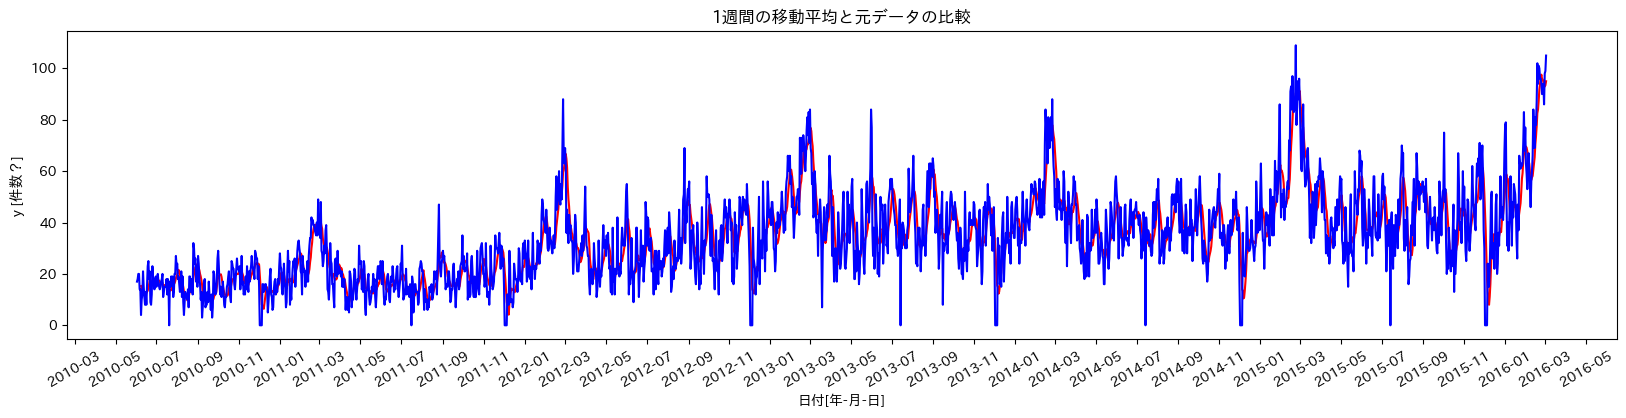

In [36]:
fig3, ax3 = plt.subplots(figsize=(20,4))

#軸の角度
plt.xticks(rotation=30)

# ラベル
plt.title("1週間の移動平均と元データの比較")
plt.ylabel("y [件数？]")
plt.xlabel("日付[年-月-日]")

# 移動平均が赤
ax3.plot(train["datetime"], train["move_avg_week"], c="red")

# 日付の指定
locator = mdates.MonthLocator(bymonthday=15, interval=2)
ax3.xaxis.set_major_locator(locator)

# 元のデータ
ax3.plot(train["datetime"], train["y"], c="blue")


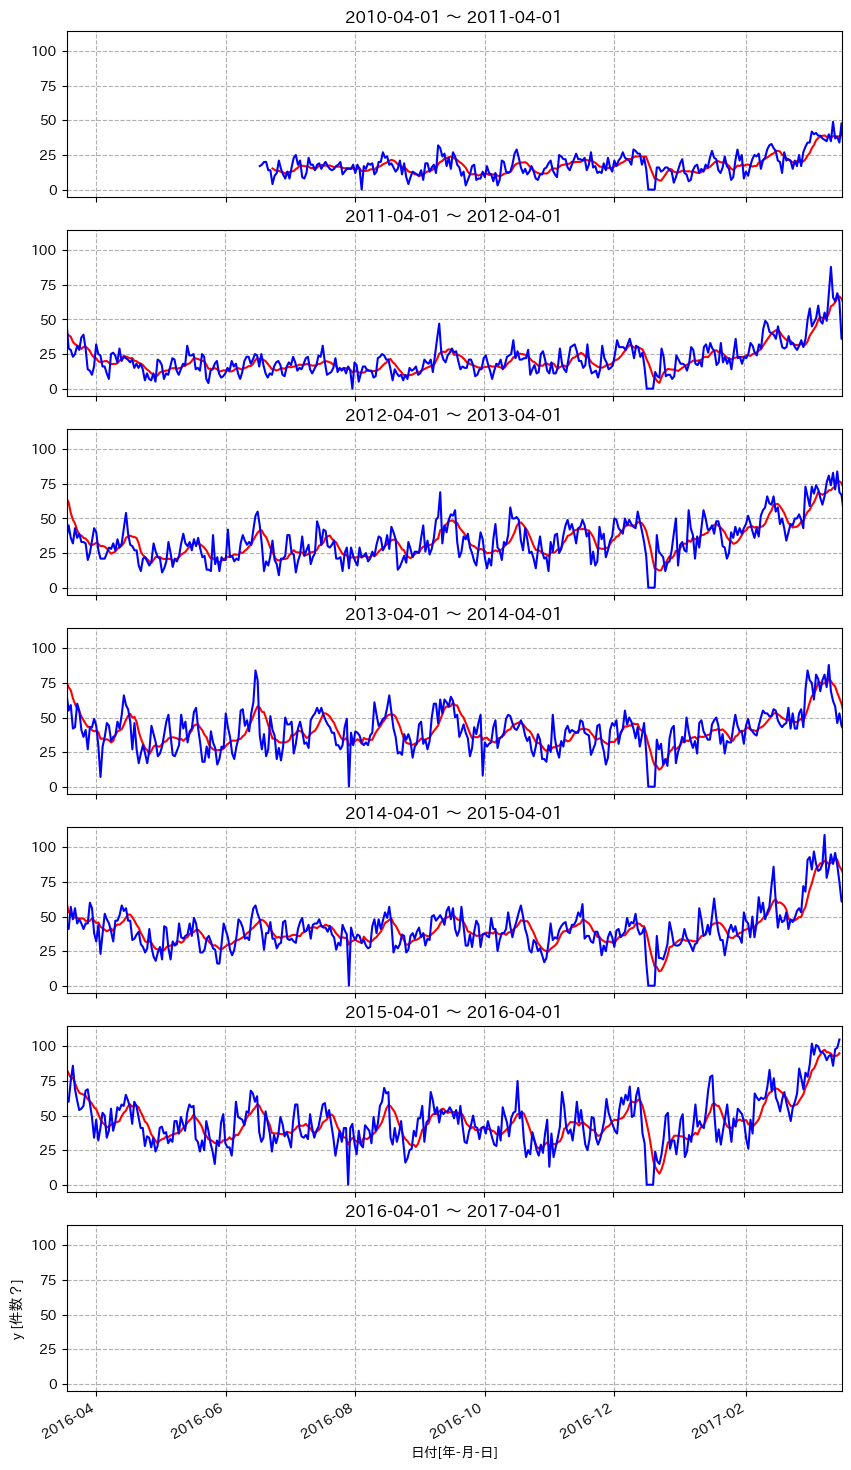

In [37]:
import datetime

datetime_list = [
    datetime.datetime(2010, 4, 1),
    datetime.datetime(2011, 4, 1),
    datetime.datetime(2012, 4, 1),
    datetime.datetime(2013, 4, 1),
    datetime.datetime(2014, 4, 1),
    datetime.datetime(2015, 4, 1),
    datetime.datetime(2016, 4, 1),
    datetime.datetime(2017, 4, 1),# train だと出力されない
    # datetime.datetime(2018, 4, 1),
]

fig_list1, ax_list1 = plt.subplots(len(datetime_list)-1,figsize=(10,20))


for number in range(len(datetime_list)-1):

    #軸の角度
    fig_list1.autofmt_xdate(rotation=30)

    # ラベル
    plt.title("1週間の移動平均")
    plt.ylabel("y [件数？]")
    plt.xlabel("日付[年-月-日]")
    ax_list1[number].set_xlim(datetime_list[number], datetime_list[number+1])

    # 移動平均が赤
    ax_list1[number].plot(train["datetime"], train["move_avg_week"], c="red")
    ax_list1[number].set_title(f"{datetime_list[number].date()} ～ {datetime_list[number+1].date()}")

    # 日付の間隔の指定
    locator = mdates.MonthLocator(bymonthday=15, interval=2)
    ax_list1[number].xaxis.set_major_locator(locator)

    #軸の角度
    plt.xticks(rotation=30)

    ax_list1[number].grid(axis="x", linestyle = "--")
    ax_list1[number].grid(axis="y", linestyle = "--")

    # 元のデータ
    ax_list1[number].plot(train["datetime"], train["y"], c="blue")
